In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import xarray as xr
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature

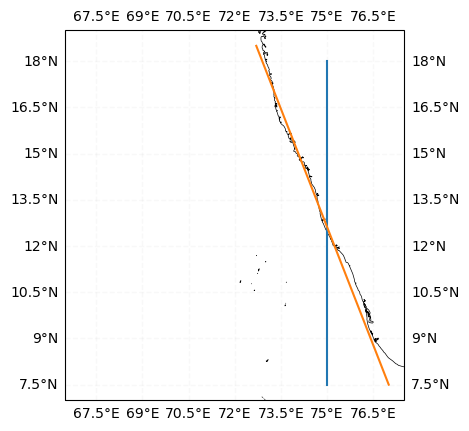

<Figure size 640x480 with 0 Axes>

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([66.5, 77.5, 19, 7], crs=ccrs.PlateCarree()) #lon,lat
ax.add_feature(cfeature.COASTLINE, alpha=1.0, lw=0.5)
gridliner = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.05, linestyle='--')
plt.plot([75, 75], [7.5, 18])
plt.plot([72.7, 77], [18.5, 7.5])
plt.show()
plt.savefig('coastal_angle.png', dpi=300)

In [6]:
lineA = ((75,7.5), (75, 18))
lineB = ((72.7,18.5), (77, 7.5))

In [7]:
import math

def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

In [8]:
def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360
    
    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 
        return ang_deg

In [9]:
coast_angle=ang(lineA, lineB)
coast_angle

158.64901975234642

In [10]:
dt = xr.open_dataset('UI/erdQAstressmday_c362_a351_400f.nc')
dt

<xarray.Dataset>
Dimensions:    (time: 146, altitude: 1, latitude: 49, longitude: 45)
Coordinates:
  * time       (time) datetime64[ns] 2009-10-16T12:00:00 ... 2021-12-16T12:00:00
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float64 7.0 7.25 7.5 7.75 ... 18.25 18.5 18.75 19.0
  * longitude  (longitude) float64 66.5 66.75 67.0 67.25 ... 77.0 77.25 77.5
Data variables:
    taux       (time, altitude, latitude, longitude) float32 ...
    tauy       (time, altitude, latitude, longitude) float32 ...
    curl       (time, altitude, latitude, longitude) float32 ...
    modStress  (time, altitude, latitude, longitude) float32 ...
    upwelling  (time, altitude, latitude, longitude) float32 ...
Attributes: (12/55)
    acknowledgement:               NOAA NESDIS COASTWATCH, NOAA SWFSC ERD
    cdm_data_type:                 Grid
    composite:                     true
    contributor_name:              EUMETSAT and NOAA|NESDIS
    contributor_role:              Source of level 2 data.
    Conventions:                   COARDS, CF-1.6, ACDD-1.3
    ...                            ...
    standard_name_vocabulary:      CF Standard Name Table v70
    summary:                       NOAA CoastWatch distributes science qualit...
    time_coverage_end:             2021-12-16T12:00:00Z
    time_coverage_start:           2009-10-16T12:00:00Z
    title:                         Wind Stress, Metop-A ASCAT, 0.25°, Global,...
    Westernmost_Easting:           66.5

In [11]:
up= dt.upwelling.groupby('time.month').mean(dim='time')

In [12]:
up1=up.sel(month=1)
up2=up.sel(month=2)
up3=up.sel(month=3)
up4=up.sel(month=4)
up5=up.sel(month=5)
up6=up.sel(month=6)
up7=up.sel(month=7)
up8=up.sel(month=8)
up9=up.sel(month=9)
up10=up.sel(month=10)
up11=up.sel(month=11)
up12=up.sel(month=12)

In [13]:
# tydt =  xr.open_mfdataset('DATA/mer_wind_stress/*.nc')
# txdt =  xr.open_mfdataset('DATA/zonal/*.nc')
# tydt

In [14]:
# def upwell(ektrx, ektry, coast_angle):
#   pi = 3.1415927
#   degtorad = pi/180.
#   alpha = (360 - coast_angle) * degtorad
#   s1 = np.cos(alpha)
#   t1 = np.sin(alpha)
#   s2 = -1 * t1
#   t2 = s1
#   perp = (s1 * ektrx) + (t1 * ektry)
#   para = (s2 * ektrx) + (t2 * ektry)
#   return(perp/10)

In [15]:
def upwell(ektrx, ektry, coast_angle):
    pi = 3.1415927
    degtorad = pi/180.
    alpha = (360 - coast_angle) * degtorad
    s1 = np.cos(alpha)
    t1 = np.sin(alpha)
    s2 = -1 * t1
    t2 = s1
    perp = (s1 * ektrx) + (t1 * ektry)
    para = (s2 * ektrx) + (t2 * ektry)
    return(perp/10)

In [16]:
# ex = dt.ektrx.groupby('time.month').mean(dim='time')
# ey = dt.ektry.groupby('time.month').mean(dim='time')

In [17]:
# ex1 = ex.sel(month=1)
# ex2 =ex.sel(month=2)
# ex3=ex.sel(month=3)
# ex4=ex.sel(month=4)
# ex5=ex.sel(month=5)
# ex6=ex.sel(month=6)
# ex7=ex.sel(month=7)
# ex8=ex.sel(month=8)
# ex9=ex.sel(month=9)
# ex10=ex.sel(month=10)
# ex11=ex.sel(month=11)
# ex12=ex.sel(month=12)

# ey1 = ey.sel(month=1)
# ey2 =ey.sel(month=2)
# ey3=ey.sel(month=3)
# ey4=ey.sel(month=4)
# ey5=ey.sel(month=5)
# ey6=ey.sel(month=6)
# ey7=ey.sel(month=7)
# ey8=ey.sel(month=8)
# ey9=ey.sel(month=9)
# ey10=ey.sel(month=10)
# ey11=ey.sel(month=11)
# ey12=ey.sel(month=12)

In [18]:
tux1= dt.taux.groupby('time.month').mean(dim='time')
tuy1= dt.tauy.groupby('time.month').mean(dim='time')

In [19]:
tux = tux1.sel(latitude = slice(8,18), longitude = slice(68, 78))
tuy = tuy1.sel(latitude = slice(8,18), longitude = slice(68, 78))

In [20]:
# taux.sel(lat = slice(8,18), long = slice(68, 78))
tux1= tux.sel(month=1)
tux2= tux.sel(month=2)
tux3= tux.sel(month=3)
tux4=tux.sel(month=4)
tux5=tux.sel(month=5)
tux6=tux.sel(month=6)
tux7=tux.sel(month=7)
tux8=tux.sel(month=8)
tux9=tux.sel(month=9)
tux10=tux.sel(month=10)
tux11=tux.sel(month=11)
tux12=tux.sel(month=12)

tuy1= tuy.sel(month=1)
tuy2= tuy.sel(month=2)
tuy3= tuy.sel(month=3)
tuy4=tuy.sel(month=4)
tuy5=tuy.sel(month=5)
tuy6=tuy.sel(month=6)
tuy7=tuy.sel(month=7)
tuy8=tuy.sel(month=8)
tuy9=tuy.sel(month=9)
tuy10=tuy.sel(month=10)
tuy11=tuy.sel(month=11)
tuy12=tuy.sel(month=12)
tuy12

<xarray.DataArray 'tauy' (altitude: 1, latitude: 41, longitude: 39)>
array([[[-0.02095667, -0.02183409, -0.02160905, ..., -0.01459992,
                 nan,         nan],
        [-0.02359021, -0.02198736, -0.02290221, ...,         nan,
                 nan,         nan],
        [-0.02452502, -0.02478486, -0.02398116, ...,         nan,
                 nan,         nan],
        ...,
        [-0.04823227, -0.04763143, -0.04789459, ...,         nan,
                 nan,         nan],
        [-0.04867705, -0.04871127, -0.04879034, ...,         nan,
                 nan,         nan],
        [-0.04854977, -0.04923569, -0.04912454, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * altitude   (altitude) float64 0.0
  * latitude   (latitude) float64 8.0 8.25 8.5 8.75 ... 17.25 17.5 17.75 18.0
  * longitude  (longitude) float64 68.0 68.25 68.5 68.75 ... 77.0 77.25 77.5
    month      int64 12
Attributes:
    colorBarMaximum:  0.5
    colorBarMinimum:  -0.5
    coordsys:         geographic
    fraction_digits:  2
    ioos_category:    Wind
    long_name:        Meridional Wind Stress
    standard_name:    surface_downward_northward_stress
    units:            Pa

In [21]:
# ui1 = upwell(ex1, ey1, coast_angle)
# ui1.plot.contourf(levels=11)

In [22]:
# ui2 = upwell(ex2, ey2, coast_angle)
# ui2.plot.contourf(levels=11)

In [23]:
# ui3 = upwell(ex3, ey3, coast_angle)
# ui3.plot.contourf(levels=11)

In [24]:
# ui4 = upwell(ex4, ey4, coast_angle)
# ui4.plot.contourf(levels=11)

In [25]:
# ui5 = upwell(ex5, ey5, coast_angle)
# ui5.plot.contourf(levels=11)

In [26]:
# ui6 = upwell(ex6, ey6, coast_angle)
# ui6.plot.contourf(levels=11)

In [27]:
# ui7 = upwell(ex7, ey7, coast_angle)
# ui7.plot.contourf(levels=11)

In [28]:
# ui8 = upwell(ex8, ey8, coast_angle)
# ui8.plot.contourf(levels=11)

In [29]:
# ui9 = upwell(ex9, ey9, coast_angle)
# ui9.plot.contourf(levels=11)

In [30]:
# ui10 = upwell(ex10, ey10, coast_angle)
# ui10.plot.contourf(levels=11)

In [31]:
# ui11 = upwell(ex11, ey11, coast_angle)
# ui11.plot.contourf(levels=11)

In [32]:
# ui12 = upwell(ex12, ey12, coast_angle)
# ui12.plot.contourf(levels=11)

In [33]:
# pw=1000
# f= 

In [34]:
qx1 = tuy1/(0.03)
qx2 = tuy2/(0.03)
qx3 = tuy3/(0.03)
qx4 = tuy4/(0.03)
qx5 = tuy5/(0.03)
qx6 = tuy6/(0.03)
qx7 = tuy7/(0.03)
qx8 = tuy8/(0.03)
qx9 = tuy9/(0.03)
qx10 = tuy10/(0.03)
qx11 = tuy11/(0.03)
qx12 = tuy12/(0.03)

qy1 = -tux1/(0.03)
qy2 = -tux2/(0.03)
qy3 = -tux3/(0.03)
qy4 = -tux4/(0.03)
qy5 = -tux5/(0.03)
qy6 = -tux6/(0.03)
qy7 = -tux7/(0.03)
qy8 = -tux8/(0.03)
qy9 = -tux9/(0.03)
qy10 = -tux10/(0.03)
qy11 = -tux11/(0.03)
qy12 = -tux12/(0.03)
# taux.sel(lat = slice(8,18), long = slice(68, 78))

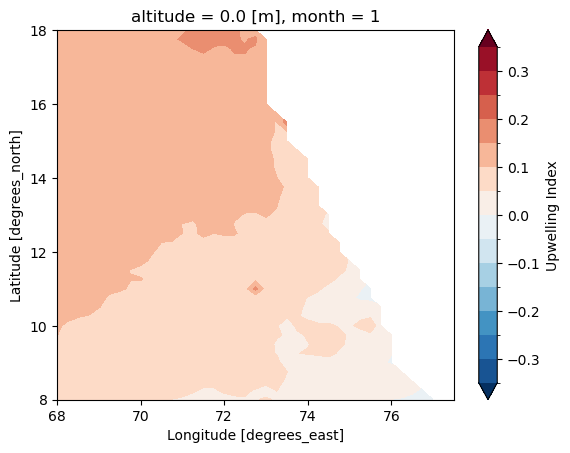

In [35]:
ui1 = upwell(qx1.isel(altitude=0), qy1.isel(altitude=0), coast_angle)
ui1.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui1.png', dpi=300)

In [36]:
ui1

<xarray.DataArray (latitude: 41, longitude: 39)>
array([[ 0.07557549,  0.07393076,  0.06905247, ..., -0.02565434,
                nan,         nan],
       [ 0.08452006,  0.08180808,  0.07488918, ...,         nan,
                nan,         nan],
       [ 0.08984478,  0.08846483,  0.0789451 , ...,         nan,
                nan,         nan],
       ...,
       [ 0.13120311,  0.134592  ,  0.13319016, ...,         nan,
                nan,         nan],
       [ 0.13210253,  0.13331427,  0.13273707, ...,         nan,
                nan,         nan],
       [ 0.13235362,  0.13138935,  0.13203017, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
    altitude   float64 0.0
  * latitude   (latitude) float64 8.0 8.25 8.5 8.75 ... 17.25 17.5 17.75 18.0
  * longitude  (longitude) float64 68.0 68.25 68.5 68.75 ... 77.0 77.25 77.5
    month      int64 1

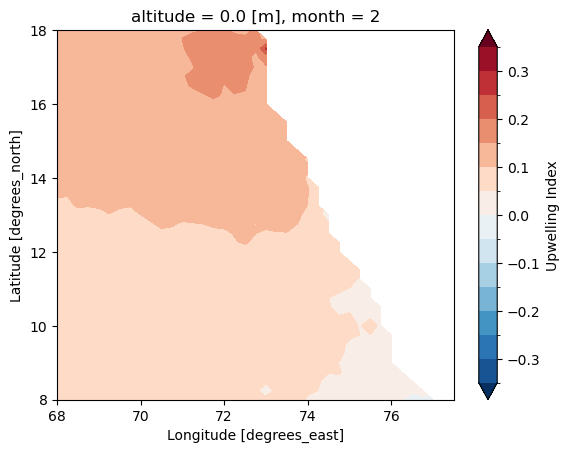

In [37]:
ui2 = upwell(qx2.isel(altitude=0), qy2.isel(altitude=0), coast_angle)
ui2.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui2.png', dpi=300)

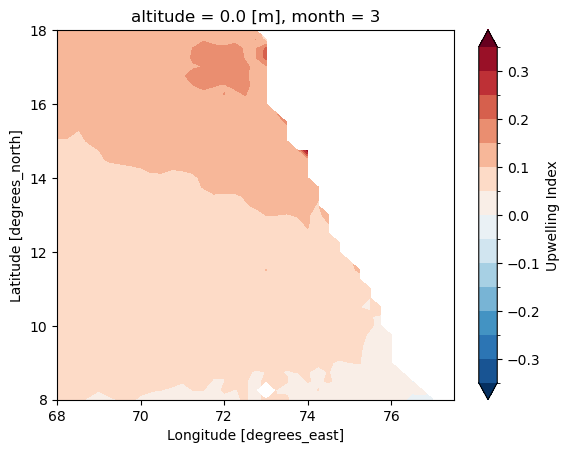

In [38]:
ui3 = upwell(qx3.isel(altitude=0), qy3.isel(altitude=0), coast_angle)
ui3.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui3.png', dpi=300)

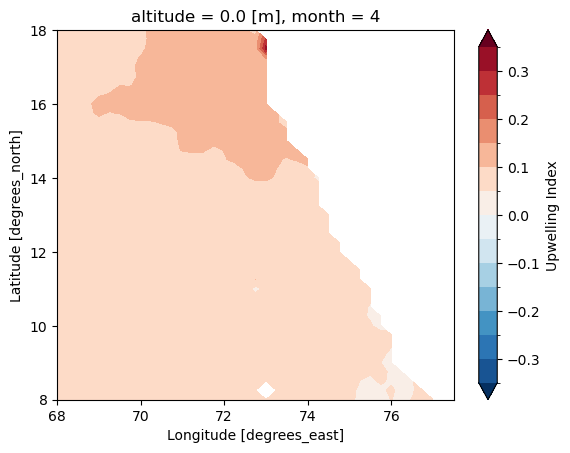

In [39]:
ui4 = upwell(qx4.isel(altitude=0), qy4.isel(altitude=0), coast_angle)
ui4.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui4.png', dpi=300)

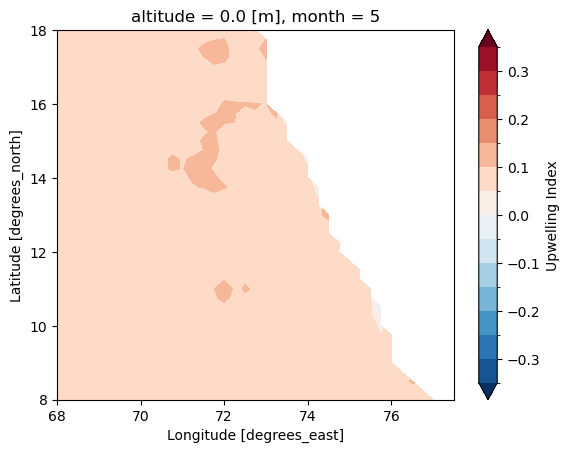

In [40]:
ui5 = upwell(qx5.isel(altitude=0), qy5.isel(altitude=0), coast_angle)
ui5.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui5.png', dpi=300)

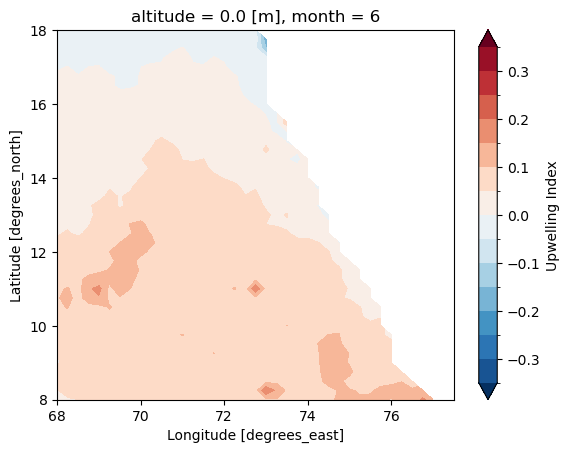

In [41]:
ui6 = upwell(qx6.isel(altitude=0), qy6.isel(altitude=0), coast_angle)
ui6.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui6.png', dpi=300)

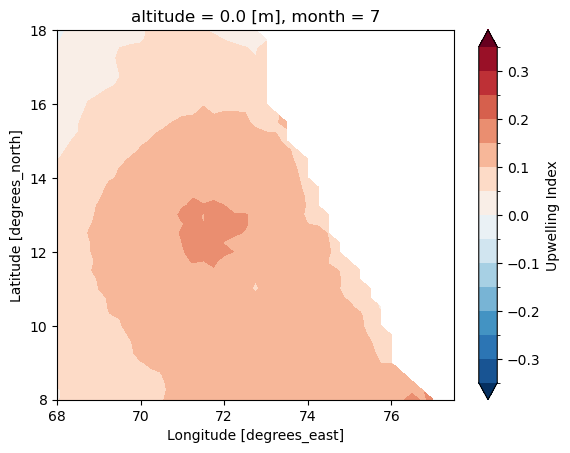

In [42]:
ui7 = upwell(qx7.isel(altitude=0), qy7.isel(altitude=0), coast_angle)
ui7.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui7.png', dpi=300)

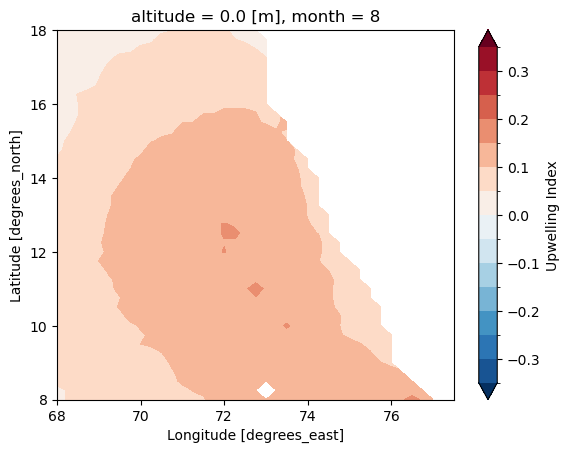

In [43]:
ui8 = upwell(qx8.isel(altitude=0), qy8.isel(altitude=0), coast_angle)
ui8.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui8.png', dpi=300)

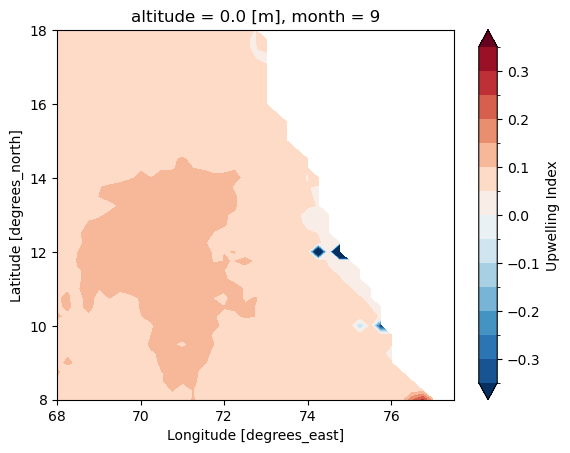

In [44]:
ui9 = upwell(qx9.isel(altitude=0), qy9.isel(altitude=0), coast_angle)
ui9.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui9.png', dpi=300)

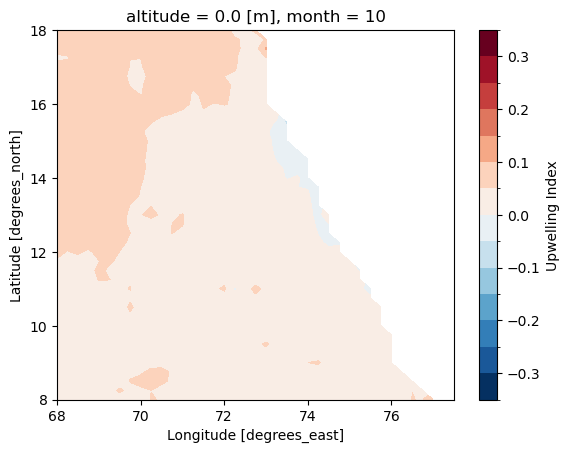

In [45]:
ui10 = upwell(qx10.isel(altitude=0), qy10.isel(altitude=0), coast_angle)
ui10.plot.contourf(levels=np.arange(-0.35,0.4,0.05), cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui10.png', dpi=300)

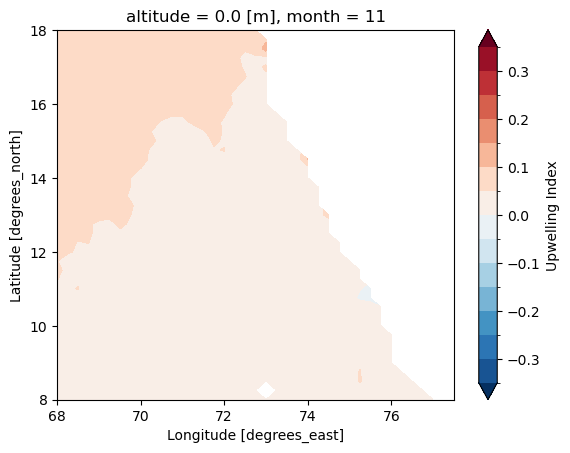

In [46]:
ui11 = upwell(qx11.isel(altitude=0), qy11.isel(altitude=0), coast_angle)
ui11.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui11.png', dpi=300)

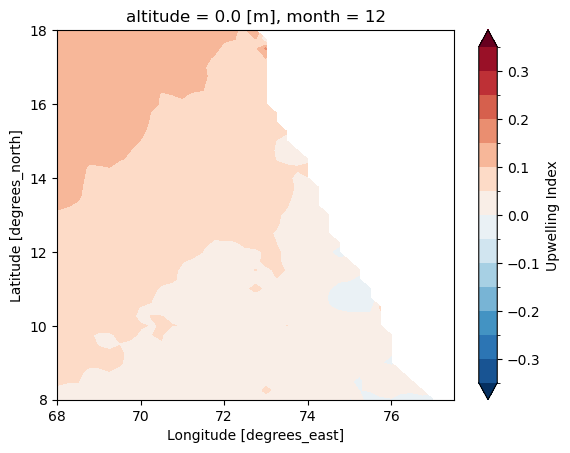

In [47]:
ui12 = upwell(qx12.isel(altitude=0), qy12.isel(altitude=0), coast_angle)
ui12.plot.contourf(levels=np.arange(-0.35,0.4,0.05),extend='both', cbar_kwargs = {"label": "Upwelling Index"})
plt.savefig('ui12.png', dpi=300)

In [48]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [49]:
# import matplotlib as mpl
# cmap = mpl.cm.jet # this defines the colors of the colormap

# # the next line defines the range of the colormap which you will see on the colorbar (keep this the same for all plots)
# norm = mpl.colors.Normalize(vmin = -1.5, vmax =9) # change vmin and vmax according to your preference but same for all plots

# ui12 = upwell(qx12, qy12, coast_angle)

# # change this vmin and vmax for that particular plot
# ui12.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui12.png', dpi=300)

In [50]:
# ui11 = upwell(qx11, qy11, coast_angle)

# # change this vmin and vmax for that particular plot
# ui11.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui11.png', dpi=300)

In [51]:
# ui10 = upwell(qx10, qy10, coast_angle)

# # change this vmin and vmax for that particular plot
# ui10.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui10.png', dpi=300)

In [52]:
# ui9 = upwell(qx9, qy9, coast_angle)

# # change this vmin and vmax for that particular plot
# ui9.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui9.png', dpi=300)

In [53]:
# ui8 = upwell(qx8, qy8, coast_angle)

# # change this vmin and vmax for that particular plot
# ui8.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui8.png', dpi=300)

In [54]:
# ui7 = upwell(qx7, qy7, coast_angle)

# # change this vmin and vmax for that particular plot
# ui7.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui7.png', dpi=300)

In [55]:
# ui6 = upwell(qx6, qy6, coast_angle)

# # change this vmin and vmax for that particular plot
# ui6.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui6.png', dpi=300)

In [56]:
# ui5 = upwell(qx5, qy5, coast_angle)

# # change this vmin and vmax for that particular plot
# ui5.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui5.png', dpi=300)

In [57]:
# ui4 = upwell(qx4, qy4, coast_angle)

# # change this vmin and vmax for that particular plot
# ui4.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui4.png', dpi=300)

In [58]:
# ui3 = upwell(qx3, qy3, coast_angle)

# # change this vmin and vmax for that particular plot
# ui3.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui3.png', dpi=300)

In [59]:
# ui2 = upwell(qx2, qy2, coast_angle)

# # change this vmin and vmax for that particular plot
# ui2.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui2.png', dpi=300)

In [60]:
# ui1 = upwell(qx1, qy1, coast_angle)

# # change this vmin and vmax for that particular plot
# ui1.plot.contourf(levels=11, cmap = cmap, vmin = -1.5, vmax =9, add_colorbar = False)
# ax = plt.gca()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='10%', pad=0.10)
# cb = mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation='vertical')
# cb.set_label('Upwelling Index')
# # plt.savefig('ui1.png', dpi=300)

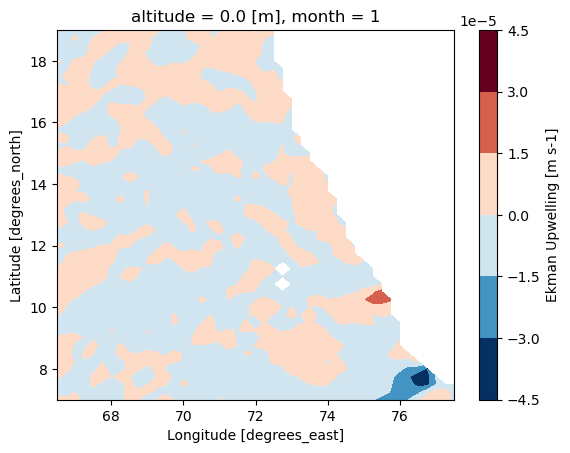

In [61]:
up1.isel(altitude=0).plot.contourf()

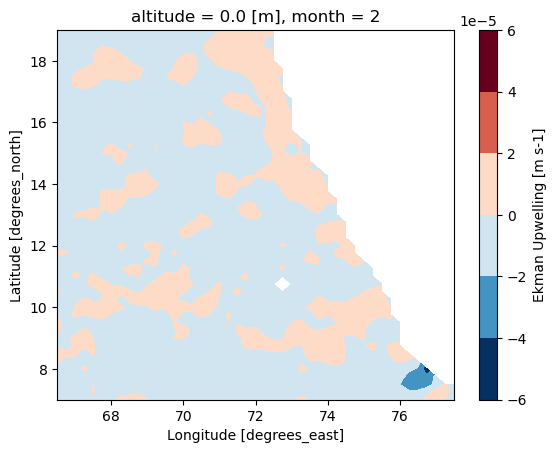

In [62]:
up2.isel(altitude=0).plot.contourf()

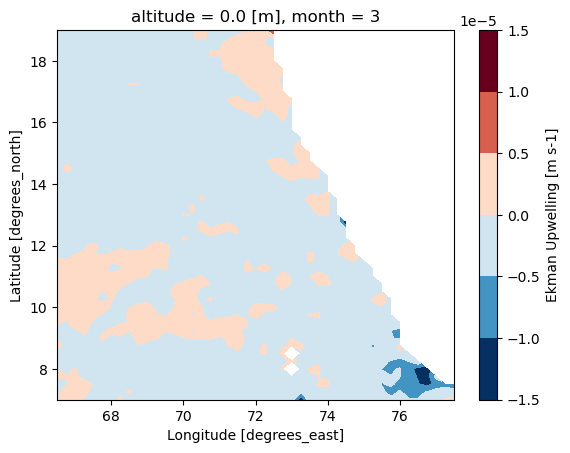

In [63]:
up3.isel(altitude=0).plot.contourf()

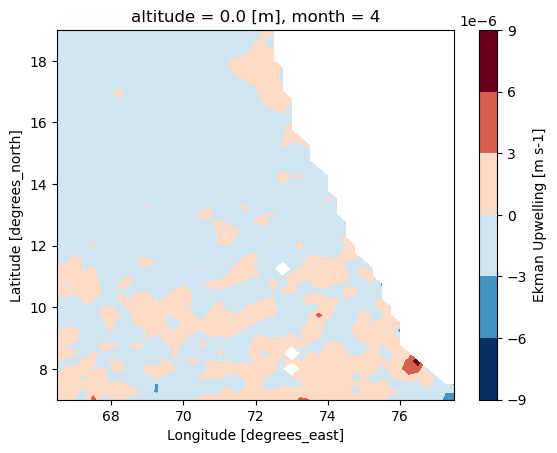

In [64]:
up4.isel(altitude=0).plot.contourf()

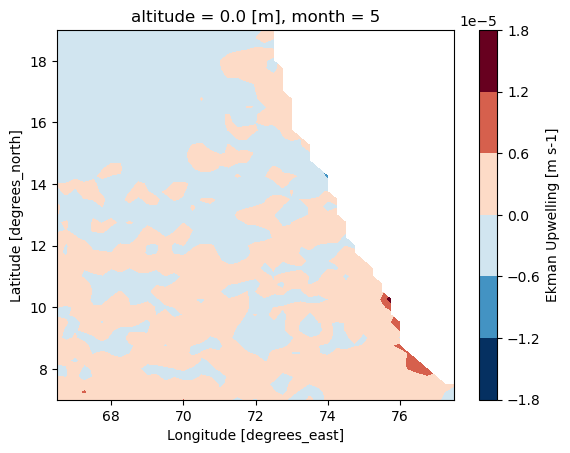

In [65]:
up5.isel(altitude=0).plot.contourf()

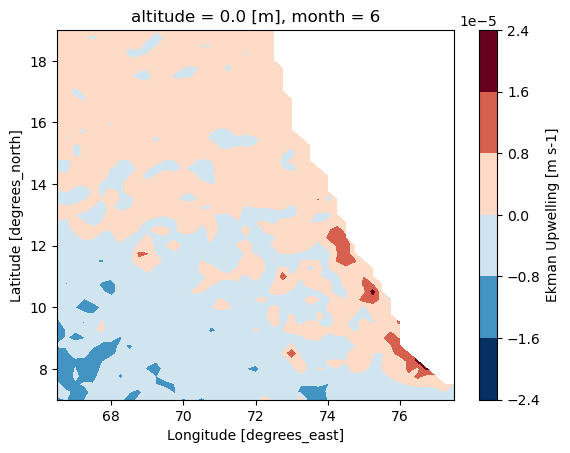

In [66]:
up6.isel(altitude=0).plot.contourf()

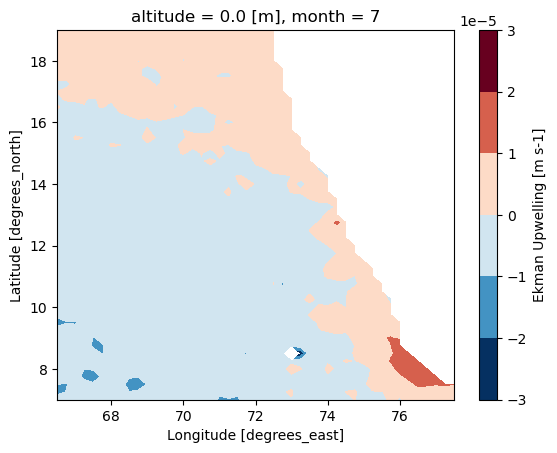

In [67]:
up7.isel(altitude=0).plot.contourf()

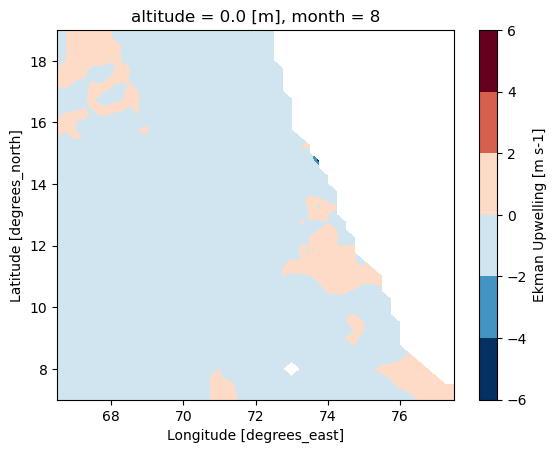

In [68]:
up8.isel(altitude=0).plot.contourf()

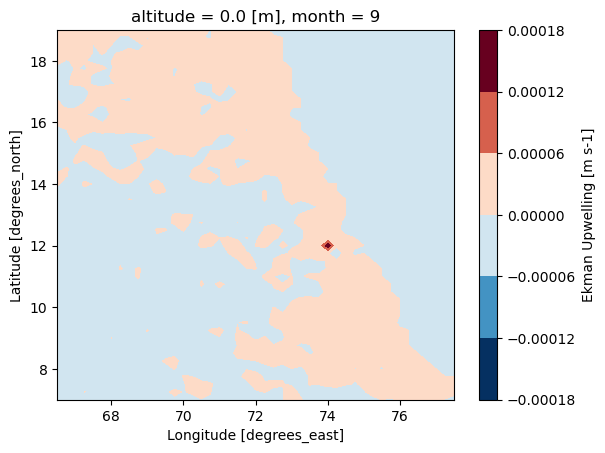

In [69]:
up9.isel(altitude=0).plot.contourf()

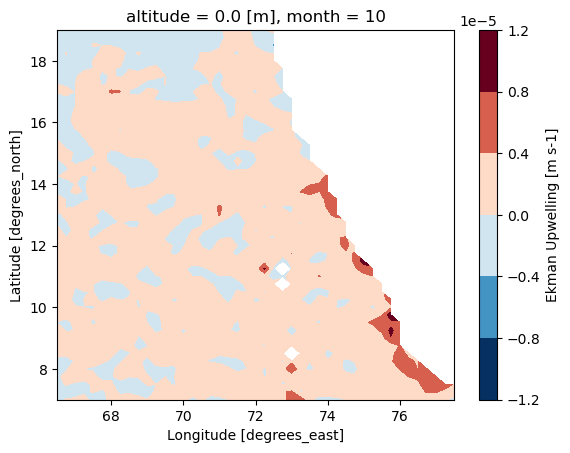

In [70]:
up10.isel(altitude=0).plot.contourf()

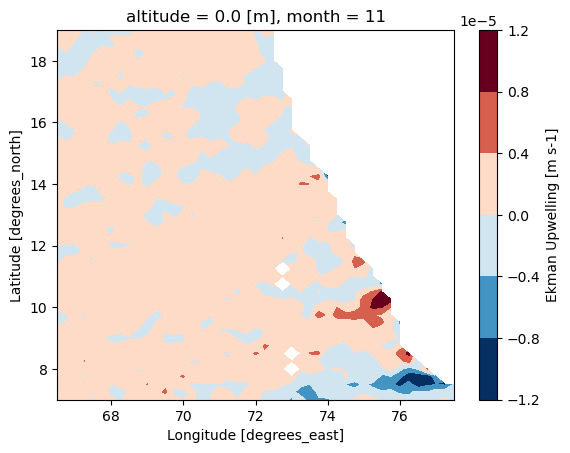

In [71]:
up11.isel(altitude=0).plot.contourf()

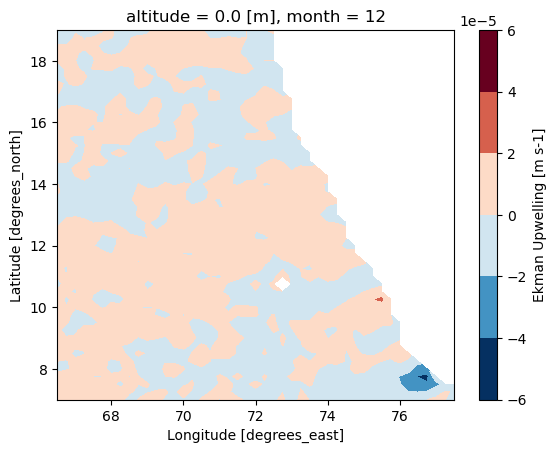

In [72]:
up12.isel(altitude=0).plot.contourf()

In [73]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
def plot_background(ax):
#     ax.add_feature(cfeature.COASTLINE, alpha=0.9, lw=0.5)
#     ax.set_global()
    # ax.add_feature(cfeature.LAND, color='lightgray')
    # ax.add_feature(cfeature.OCEAN, color='lightgray')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.01, linestyle='--')
    gl.top_labels = False
    # gl.left_labels = False
    # gl.bottom_labels = False
    gl.right_labels = False
    gl.xlines = False
    # gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8, 'color': 'k'}
    gl.ylabel_style = {'size': 8, 'color': 'k'}
    return ax

In [74]:
x, y = np.meshgrid(ui1.coords['longitude'], ui2.coords['latitude'])

In [75]:
levels = np.arange(-0.35,0.4,0.05)
z = [ui1.to_numpy(), ui2.to_numpy(),ui3.to_numpy(), ui4.to_numpy(),ui5.to_numpy(), ui6.to_numpy(),ui7.to_numpy(),ui8.to_numpy(),ui9.to_numpy(), ui10.to_numpy(), ui11.to_numpy(),ui12.to_numpy() ]
titles = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [76]:
from matplotlib.colors import BoundaryNorm as BM

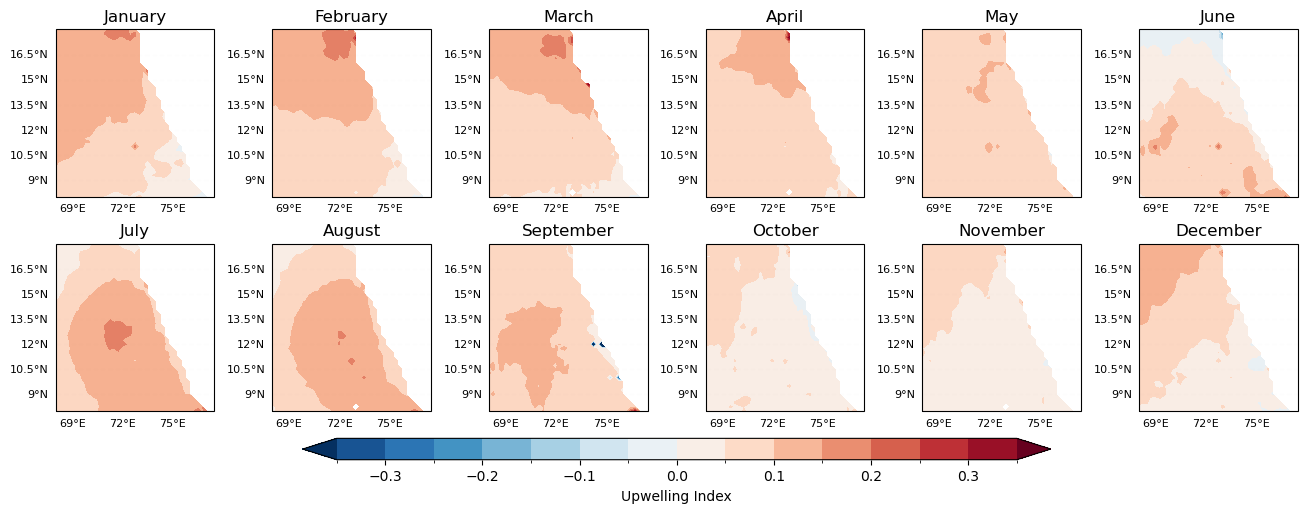

In [82]:
fig, axarr = plt.subplots(nrows=2, ncols=6, figsize=(13,5), constrained_layout=True, subplot_kw={'projection':ccrs.PlateCarree()})
axlist = axarr.flatten()

for ax in axlist:
    plot_background(ax)
for i in range(len(z)):
    axlist[i].contourf(x, y, z[i], cmap = 'RdBu_r', transform = ccrs.PlateCarree(), levels=levels, extend='both')
    axlist[i].set_title(titles[i], fontsize=12)
norm = BM(levels, 256, extend='both')
fig.colorbar(m.cm.ScalarMappable(norm = norm, cmap='RdBu_r'), ax = axlist , \
                orientation = 'horizontal', shrink=0.6, aspect = 35, pad = 0.02, label = 'Upwelling Index')
plt.savefig('ui_final_ppt.png', dpi=300, bbox_inches='tight')